In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [20]:
!git add .

In [21]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [22]:
!git commit -m "tested new action space for 500k steps"

[main 0133460] tested new action space for 500k steps
 6 files changed, 501762 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (92%)
 create mode 100644 ppo_rewards_actionspace
 rewrite real_model_ppo_action.zip (88%)


In [ ]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [3]:
!git pull origin

remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 28 (delta 15), reused 26 (delta 13), pack-reused 0
Unpacking objects: 100% (28/28), done.
From https://github.com/ahhuang007/Sebastian
   0133460..68ac77b  main       -> origin/main
Updating 0133460..68ac77b
Checking out files: 100% (45/45), done.
Fast-forward
 gym-seb/gym_seb.egg-info/PKG-INFO                  |  10 +--
 .../gym_seb/__pycache__/__init__.cpython-37.pyc    | Bin 352 -> 344 bytes
 .../envs/__pycache__/__init__.cpython-37.pyc       | Bin 288 -> 280 bytes
 .../envs/__pycache__/seb_env.cpython-37.pyc        | Bin 5160 -> 5152 bytes
 gym-seb/gym_seb/envs/seb_env.py                    |  27 ++-----
 gym-seb/setup.py                                   |   2 +-
 .../random_model_ddpg.zip                          | Bin
 .../random_model_ppo.zip                           | Bin
 .../random_model_ppo_action.zip                    | Bin
 

In [23]:
!git push origin

Counting objects: 13, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 5.87 MiB | 2.69 MiB/s, done.
Total 13 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/ahhuang007/Sebastian.git
   1a8242c..0133460  main -> main


Installing stable_baselines since it might be better

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks


In [4]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 5.2 MB/s 


Installing my custom environment

In [ ]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content


In [6]:
%cd gym-seb

/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [7]:
!pip install -e .

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/Sebastian/gym-seb
  Attempting uninstall: gym-seb
    Found existing installation: gym-seb 0.0.5
    Can't uninstall 'gym-seb'. No files were found to uninstall.
  Running setup.py develop for gym-seb


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


In [5]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [6]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['rewards'][0])


In [8]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 10000
-7.539119451394071e-08
maximum timestep reached for episode
resetting environment
at episode 20000
-2.026983129326254e-06
maximum timestep reached for episode
resetting environment
at episode 30000
-7.529796857852489e-07
maximum timestep reached for episode
resetting environment
at episode 40000
-9.596090239938349e-07
maximum timestep reached for episode
resetting environment
at episode 50000
-9.131168917519972e-07
maximum timestep reached for episode
resetting environment
at episode 60000
-9.059321746462956e-07
maximum timestep reached for episode
resetting environment
at episode 70000
-9.111274266615511e-07
maximum timestep reached for episode
resetting environment
at episode 80000
-9.089816740015522e-07
maximum timestep reached for episode
resetting environment
at episode 90000
-9.127032535616308e-07
maximum timestep reached for episode
resetting environment
at episode 100000
-9.11351089598611e-07
maximum timestep reached for episode
resetting 

In [9]:
model.save("models/random_model_ppo")

In [7]:
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
record = Recorder(data, log_dir = "/")

In [16]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo")

resetting environment
resetting environment
robot has flipped over at timestep 401139
resetting environment
robot has flipped over at timestep 401188
resetting environment
robot has flipped over at timestep 401242
resetting environment
robot has flipped over at timestep 401308
resetting environment
robot has flipped over at timestep 401360
resetting environment
robot has flipped over at timestep 401408
resetting environment
robot has flipped over at timestep 401455
resetting environment
robot has flipped over at timestep 401516
resetting environment
robot has flipped over at timestep 401566
resetting environment
robot has flipped over at timestep 401612
resetting environment
robot has flipped over at timestep 401669
resetting environment
robot has flipped over at timestep 401712
resetting environment
robot has flipped over at timestep 401758
resetting environment
robot has flipped over at timestep 401800
resetting environment
robot has flipped over at timestep 401854
resetting environm

In [17]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 501506
resetting environment
robot has flipped over at timestep 501574
resetting environment
robot has flipped over at timestep 501639
resetting environment
robot has flipped over at timestep 501704
resetting environment
robot has flipped over at timestep 501769
resetting environment
robot has flipped over at timestep 501834
resetting environment
robot has flipped over at timestep 501899
resetting environment
robot has flipped over at timestep 501964
resetting environment
robot has flipped over at timestep 502029
resetting environment
robot has flipped over at timestep 502094
resetting environment
mean_reward=-0.06 +/- 0.0040257588359879


Plotting

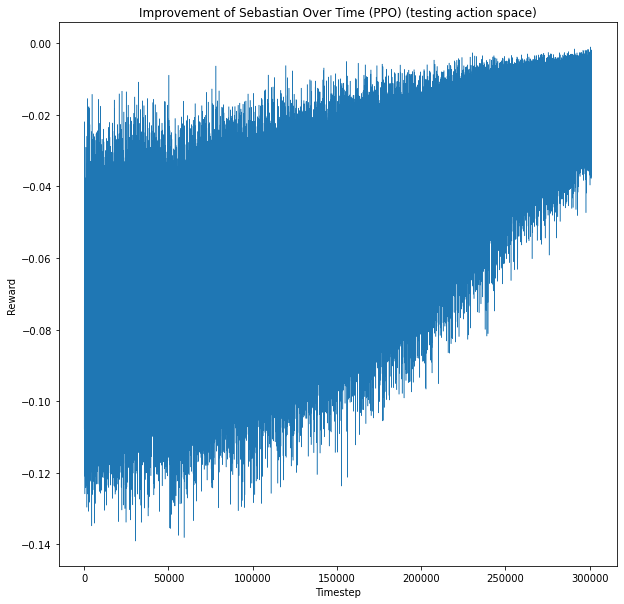

In [15]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Time (PPO) (testing action space)")
plt.show()

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken, 

In [ ]:
#Testing TD3
from stable_baselines3 import TD3
td3_model = TD3('MlpPolicy', env, verbose = 1)
td3_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(td3_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 1114318
resetting environment
at episode 1120000
-1.541983962059021
maximum timestep reached for episode
resetting environment
at episode 1130000
-1.4691083431243896
maximum timestep reached for episode
resetting environment
at episode 1140000
-2.7713000774383545
maximum timestep reached for episode
resetting environment
at episode 1150000
-1.830146312713623
maximum timestep reached for episode
resetting environment
at episode 1160000
-1.852158546447754
maximum timestep reached for episode
resetting environment
at episode 1170000
-0.8908807039260864
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 1174587
resetting environment
robot has flipped over at timestep 1176486
resetting environment
robot has flipped over at timestep 1176766
resetting environment
mean_reward=-11838.14 +/- 8694.458009957501


In [ ]:
td3_model.save("random_model_td3")

In [ ]:
td3_model = TD3.load("real_model_td3", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
class TD3Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(TD3Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['episode_reward'])


In [ ]:
data2 = []
record = TD3Recorder(data2, log_dir = "/")

In [ ]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

td3_model = td3_model.learn(total_timesteps = 100000, log_interval = 100, callback = record)
td3_model.save("real_model_td3")

resetting environment
resetting environment
robot has flipped over at timestep 1176860
resetting environment
robot has flipped over at timestep 1177452
resetting environment
at episode 1180000
-14.475334167480469
maximum timestep reached for episode
resetting environment
at episode 1190000
-13.632710456848145
maximum timestep reached for episode
resetting environment
at episode 1200000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1210000
-13.752696990966797
maximum timestep reached for episode
resetting environment
at episode 1220000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1230000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1240000
-14.327017784118652
maximum timestep reached for episode
resetting environment
at episode 1250000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1260000
-14.804475784301758
rob

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 1280000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1290000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1300000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1310000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1320000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1330000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1340000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1350000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1360000
-14.804475784301758
maximum timestep reached for episode
resetting environment
at episode 1370000
-14.804475784301758
maximum timestep reached for episode
resetting environmen

In [18]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data})

In [19]:
df.to_csv("ppo_rewards_actionspace")